**Random Forest**


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import time

data=pd.read_csv("loan_data.csv")
targets=data['loan_status']

data.drop('loan_status',axis=1,inplace=True)
encoder=LabelEncoder()

# Encoding Features 
data["person_gender"]=encoder.fit_transform(data['person_gender'])
data["person_education"]=encoder.fit_transform(data['person_education'])
data["person_home_ownership"]=encoder.fit_transform(data['person_home_ownership'])
data["loan_intent"]=encoder.fit_transform(data['loan_intent'])
data['previous_loan_defaults_on_file'] = encoder.fit_transform(data['previous_loan_defaults_on_file'])

X_train,X_test,Y_train,Y_test=train_test_split(data,targets,test_size=0.02,random_state=42)

# parameters for random forest tree
paramiter_grid={
    "n_estimators":[50,10,30,20],
    "max_depth":[4,10,5,7],
    "min_samples_split":[4,2,7,5],
    "min_samples_leaf":[1,2,3,4],
    "bootstrap":[True,False]
}
# initionalizing random forest
rf=RandomForestClassifier()
# initionalizing the grid cv
random_grid_search=RandomizedSearchCV(estimator=rf,param_distributions=paramiter_grid,
                               n_iter=100,cv=3,verbose=0,n_jobs=-1,scoring="accuracy")

start_time=time.time()
random_grid_search.fit(X_train,Y_train)
end_time = time.time()
execution_time = end_time - start_time
best_parametre=random_grid_search.best_estimator_

perdict_rf=best_parametre.predict(X_test)
accuracy_rf=accuracy_score(Y_test,perdict_rf)
precision_rf=precision_score(Y_test,perdict_rf)
recall_rf=recall_score(Y_test,perdict_rf)
f1_rf=f1_score(Y_test,perdict_rf)
cm=confusion_matrix(Y_test,perdict_rf)
print(cm)
# PRINTING ALL ACCURACY PERCITION RECALL F1SCORE
print(accuracy_rf)
print(precision_rf)
print(recall_rf)
print(f1_rf)
print(f"{execution_time:.2f}")


[[672   9]
 [ 61 158]]
0.9222222222222223
0.9461077844311377
0.7214611872146118
0.8186528497409327
27.36


**Graph for best parameter using random forest (loan_dataset)**
 

<BarContainer object of 13 artists>

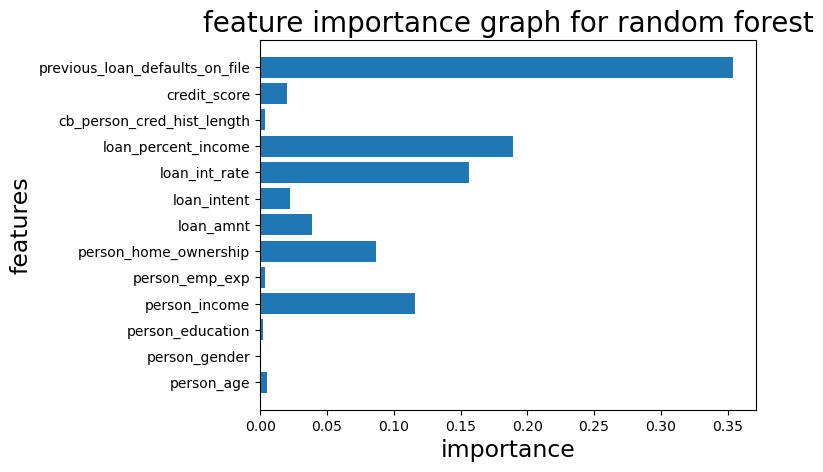

In [5]:
import matplotlib.pyplot as plt



plt.title("feature importance graph for random forest",fontsize=20,color='black')
plt.xlabel("importance",fontsize=17,color='black')
plt.ylabel("features",fontsize=17,color='black')
plt.barh(data.columns,best_parametre.feature_importances_)


**Confustion Matrix for Random Forest**

In [ ]:
import seaborn as sb
plt.figure(figsize=(8, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Support Vector Machine**


In [6]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt



# preprocessing
data=pd.read_csv('loan_data.csv')
targets=data['loan_status']
data.drop('loan_status',axis=1,inplace=True)

# Encoding Features 

encoder=LabelEncoder()
data["person_gender"]=encoder.fit_transform(data['person_gender'])
data["person_education"]=encoder.fit_transform(data['person_education'])
data["person_home_ownership"]=encoder.fit_transform(data['person_home_ownership'])
data["loan_intent"]=encoder.fit_transform(data['loan_intent'])
data['previous_loan_defaults_on_file'] = encoder.fit_transform(data['previous_loan_defaults_on_file'])


# Balancing the clases to avoid biasness of the model and better training 
smote=SMOTE()
X_balance,Y_balance=smote.fit_resample(data,targets)

print(X_balance.shape)


# Splitting the data 
X_train,X_test,Y_train,Y_test=train_test_split(X_balance,Y_balance,random_state=42,test_size=0.3)

# Scaling the data
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)


paramiter_grid={
    "C":[1,10,100],
    "gamma":[1, 0.1,0.001],
    "kernel":['rbf','linear']
}


# modle variable
svm=SVC(random_state=42)

random_search=RandomizedSearchCV(estimator=svm,param_distributions=paramiter_grid,cv=3,verbose=2,n_jobs=3)


start_time=time.time()
random_search.fit(X_train,Y_train)
end_time=time.time()

total_time=end_time-start_time

best_estimator=random_search.best_estimator_
print(best_estimator)



perdict_svm=best_estimator.predict(X_test)
accuracy_svm=accuracy_score(Y_test,perdict_svm)
precision_svm=precision_score(Y_test,perdict_svm)
recall_svm=recall_score(Y_test,perdict_svm)
f1_svm=f1_score(Y_test,perdict_svm)
cm_svm=confusion_matrix(Y_test,perdict_svm)
print(cm_svm)


# PRINTING ALL ACCURACY PERCITION RECALL F1SCORE
print(accuracy_svm)
print(precision_svm)
print(recall_svm)
print(f1_svm)
print(f"{total_time:.2f}")







(70000, 13)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 3.6min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 3.6min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 3.6min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 4.0min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 4.1min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 4.1min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  48.9s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  48.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  49.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  33.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  33.2s
[CV] END .........................C=

**Confusion Matrix SVM**


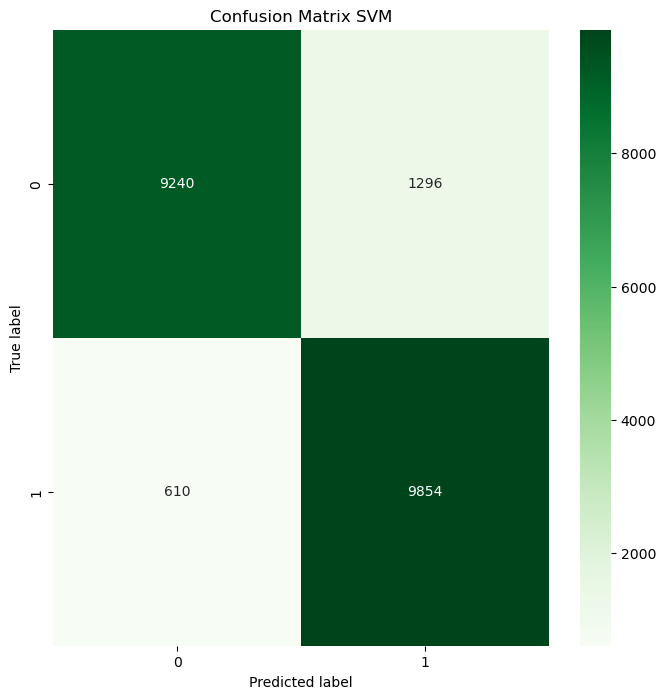

In [7]:
import seaborn as sb
plt.figure(figsize=(8, 8))
sb.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Logistic Regression**

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import time

# Load and prepare data
data = pd.read_csv("loan_data.csv")
y = data["loan_status"]
data.drop("loan_status", axis=1,inplace=True)




encoder=LabelEncoder()
data["person_gender"]=encoder.fit_transform(data['person_gender'])
data["person_education"]=encoder.fit_transform(data['person_education'])
data["person_home_ownership"]=encoder.fit_transform(data['person_home_ownership'])
data["loan_intent"]=encoder.fit_transform(data['loan_intent'])
data['previous_loan_defaults_on_file'] = encoder.fit_transform(data['previous_loan_defaults_on_file'])


param_grid = {
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'],               
    'max_iter': [100, 200,100]
}
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=8)  
X_pca = pca.fit_transform(X_scaled)



# balancing clases
smote=SMOTE(random_state=42)
X_pca,y=smote.fit_resample(X_pca,y)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(X_pca.shape)
# model variable
lr=LogisticRegression()

# Random Search Cv
random_search_cv_lr=RandomizedSearchCV(estimator=lr,cv=5,param_distributions=param_grid,verbose=0,n_jobs=2)

start_time=time.time()
random_search_cv_lr.fit(X_train,y_train)

best_extimators_lr=random_search_cv_lr.best_estimator_

pertict_lr=best_extimators_lr.predict(X_test)

end_time=time.time()
total_time_lr=end_time-start_time
accuracy_lr=accuracy_score(y_test,pertict_lr)
precision_lr=precision_score(y_test,pertict_lr)
recall_lr=recall_score(y_test,pertict_lr)
f1_lr=f1_score(y_test,pertict_lr)
cm_lr=confusion_matrix(y_test,pertict_lr)


print(cm_lr)


# PRINTING ALL ACCURACY PERCITION RECALL F1SCORE
print(accuracy_lr)
print(precision_lr)
print(recall_lr)
print(f1_lr)
print(f"{total_time_lr:.2f}")

(70000, 8)
[[5817 1206]
 [ 977 6000]]
0.8440714285714286
0.832639467110741
0.8599684678228465
0.8460833392089121
7.93


***Confusion Matrix Logistic Regression ***


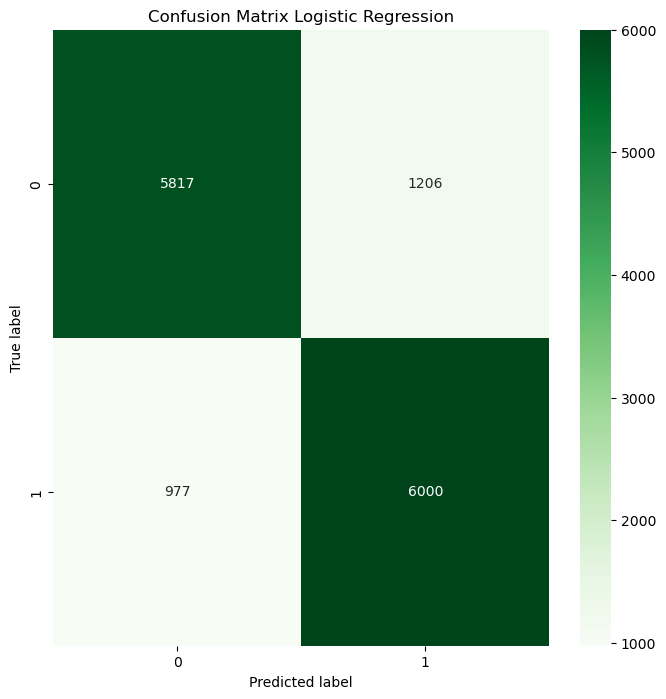

In [9]:
import seaborn as sb
plt.figure(figsize=(8, 8))
sb.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Model Comparison**

In [10]:
comparision={

    "Accuracy":[accuracy_rf,accuracy_svm,accuracy_lr],
    'Precision':[precision_rf,precision_svm,precision_lr],
    'Recal':[recall_rf,recall_svm,recall_lr],
    'F1_score':[f1_rf,f1_svm,f1_lr],
    'Best_Parameters':[best_parametre,best_estimator,best_extimators_lr],
     "Time (s)":[execution_time,total_time,total_time_lr],
    "Comments":['Best for large dataset with high dimentions','Not good for large ad imbalance dataset',"Faster but not for high dimentional data"]
   
    
}

y=pd.DataFrame(comparision,index=['Random_forest','SVM','Logistic Regression'])

print(y)











                     Accuracy  Precision     Recal  F1_score  \
Random_forest        0.922222   0.946108  0.721461  0.818653   
SVM                  0.909238   0.883767  0.941705  0.911816   
Logistic Regression  0.844071   0.832639  0.859968  0.846083   

                                                       Best_Parameters  \
Random_forest        (DecisionTreeClassifier(max_depth=10, max_feat...   
SVM                              SVC(C=10, gamma=0.1, random_state=42)   
Logistic Regression  LogisticRegression(max_iter=200, penalty='l1',...   

                        Time (s)                                     Comments  
Random_forest          27.361961  Best for large dataset with high dimentions  
SVM                  1208.147221      Not good for large ad imbalance dataset  
Logistic Regression     7.929960     Faster but not for high dimentional data  
